## Umar Sohi

In [1]:
import numpy as np
import pandas as pd
import random as rnd
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Exploring what the Datasets look like for each participant
### will be extended to all subjects later

In [2]:
s1 = pd.read_csv('Protocol/subject101.dat',sep=' ')
# Dataset headers... I made one and added it to the top of each file
# aID = activityID
# hr = heartrate
# h = hand   c = chest    a = ankle
# EX:  ha3 = heart acceleration 3 ...... aorient2 = ankle orientation2


In [3]:
s1.head()

,time,aID,hr,htemp,ha1,ha2,ha3,ha4,ha5,ha6,...,agyro1,agyro2,agyro3,amagne1,amagne2,amagne3,aorient1,aorient2,aorient3,aorient4
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0


In [4]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376417 entries, 0 to 376416
Data columns (total 54 columns):
time        376417 non-null float64
aID         376417 non-null int64
hr          34389 non-null float64
htemp       374963 non-null float64
ha1         374963 non-null float64
ha2         374963 non-null float64
ha3         374963 non-null float64
ha4         374963 non-null float64
ha5         374963 non-null float64
ha6         374963 non-null float64
hgyro1      374963 non-null float64
hgyro2      374963 non-null float64
hgyro3      374963 non-null float64
hmagne1     374963 non-null float64
hmagne2     374963 non-null float64
hmagne3     374963 non-null float64
horient1    374963 non-null float64
horient2    374963 non-null float64
horient3    374963 non-null float64
horient4    374963 non-null float64
ctemp       375908 non-null float64
ca1         375908 non-null float64
ca2         375908 non-null float64
ca3         375908 non-null float64
ca4         375908 non-null 

## Dropping 6g Accelerometer and orientation columns

In [5]:
# this is the multi-line version... its easier to read

#s1 = s1.drop(['ha4','ha5','ha6'], axis=1)  #drops head 6g accerlormeters and orientation columns
#s1 = s1.drop(['ca4','ca5','ca6'], axis=1)
#s1 = s1.drop(['aa4','aa5','aa6'], axis=1)

#s1 = s1.drop(['horient1','horient2','horient3','horient4'], axis=1)   #drops orientation columns
#s1 = s1.drop(['corient1','corient2','corient3','corient4'], axis=1)
#s1 = s1.drop(['aorient1','aorient2','aorient3','aorient4'], axis=1)

#s1

In [6]:
# this is the one line version... to drop the BAD columns
s1 = s1.drop(['ha4','ha5','ha6','ca4','ca5','ca6','aa4','aa5','aa6','horient1','horient2','horient3','horient4','corient1','corient2','corient3','corient4','aorient1','aorient2','aorient3','aorient4'], axis=1)
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376417 entries, 0 to 376416
Data columns (total 33 columns):
time       376417 non-null float64
aID        376417 non-null int64
hr         34389 non-null float64
htemp      374963 non-null float64
ha1        374963 non-null float64
ha2        374963 non-null float64
ha3        374963 non-null float64
hgyro1     374963 non-null float64
hgyro2     374963 non-null float64
hgyro3     374963 non-null float64
hmagne1    374963 non-null float64
hmagne2    374963 non-null float64
hmagne3    374963 non-null float64
ctemp      375908 non-null float64
ca1        375908 non-null float64
ca2        375908 non-null float64
ca3        375908 non-null float64
cgyro1     375908 non-null float64
cgyro2     375908 non-null float64
cgyro3     375908 non-null float64
cmagne1    375908 non-null float64
cmagne2    375908 non-null float64
cmagne3    375908 non-null float64
atemp      375090 non-null float64
aa1        375090 non-null float64
aa2        375090

In [7]:
#Dropping time column

s1 = s1.drop(['time'], axis=1)

In [8]:
#Goal: replace NaNs in heartRate with the most recent Value

last_val = 100 #in case first values are NaN... 100 is the average heart rate... this only affects like, max 8 values
k = 0

while k < len(s1['hr']):
    if math.isnan(s1['hr'][k]):
        s1.set_value(k,'hr',last_val)
    else :
        last_val = s1['hr'][k]
    k = k+1
s1['hr']

0         104.0
1         104.0
2         104.0
3         104.0
4         104.0
5         104.0
6         104.0
7         104.0
8         104.0
9         104.0
10        104.0
11        104.0
12        104.0
13        104.0
14        104.0
15        104.0
16        104.0
17        104.0
18        104.0
19        104.0
20        104.0
21        104.0
22        104.0
23        104.0
24        104.0
25        104.0
26        104.0
27        104.0
28        104.0
29        104.0
          ...  
376387    128.0
376388    128.0
376389    128.0
376390    128.0
376391    128.0
376392    128.0
376393    128.0
376394    128.0
376395    128.0
376396    128.0
376397    128.0
376398    128.0
376399    128.0
376400    128.0
376401    128.0
376402    128.0
376403    128.0
376404    128.0
376405    128.0
376406    128.0
376407    128.0
376408    128.0
376409    128.0
376410    128.0
376411    128.0
376412    128.0
376413    128.0
376414    128.0
376415    128.0
376416    128.0
Name: hr, Length: 376417

In [9]:
#Dropping activityID = 0
#Because 0 is transitional... its a mix of all activities, and not of interest

i = 0
index_to_drop = []
while i < len(s1):
    if s1['aID'][i] == 0:
        index_to_drop.append(i)
    i = i+1
s1 = s1.drop(index_to_drop)

## Loading all Protocol activities... for all subjects

In [2]:
s1 = pd.read_csv('Protocol/subject101.dat',sep=' ')
s2 = pd.read_csv('Protocol/subject102.dat',sep=' ')
s3 = pd.read_csv('Protocol/subject103.dat',sep=' ')
s4 = pd.read_csv('Protocol/subject104.dat',sep=' ')
s5 = pd.read_csv('Protocol/subject105.dat',sep=' ')
s6 = pd.read_csv('Protocol/subject106.dat',sep=' ')
s7 = pd.read_csv('Protocol/subject107.dat',sep=' ')
s8 = pd.read_csv('Protocol/subject108.dat',sep=' ')
s9 = pd.read_csv('Protocol/subject109.dat',sep=' ')

In [3]:
#to make it easier... subjects[3] = s3
s0=0
subjects = [s0,s1,s2,s3,s4,s5,s6,s7,s8,s9]


In [4]:
#dropping bad columns from all subjects' dataframes
#still need to drop aID = 0 rows

q = 1
while q<10:
    subjects[q] = subjects[q].drop(['time','ha4','ha5','ha6','ca4','ca5','ca6','aa4','aa5','aa6','horient1','horient2','horient3','horient4','corient1','corient2','corient3','corient4','aorient1','aorient2','aorient3','aorient4'], axis=1)
    q = q+1
    

In [5]:
#replace NaNs in heartRate with the most recent Value

h = 1
while h < 10:
    last_val = 100 #default, average heart rate, in case the first 9 values are NaN
    k = 0
    while k < len(subjects[h]['hr']):
        if math.isnan(subjects[h]['hr'][k]):
            subjects[h].set_value(k,'hr', last_val)
        else :
            last_val = subjects[h]['hr'][k]
        k = k+1
    h = h+1


In [7]:
#dropping activityID = 0 for all

z = 1
while z <10:
    i = 0
    index_to_drop = []
    while i < len(subjects[z]):
        if subjects[z]['aID'][i] == 0:
            index_to_drop.append(i)
        i = i+1
    subjects[z] = subjects[z].drop(index_to_drop)
    z = z + 1

In [8]:
#Combining all subjects into one dataframe
all_subjects = pd.concat(subjects[1:10])

# Feature Selection
We'll create absolute magnitude acceleration features

In [9]:
#chest acceleration magnitude
def absacc(row):
    return np.sqrt(row['ca1']**2 + row['ca2']**2 + row['ca3']**2)

#chest rotation magnitude
def absgyro(row):
    return np.sqrt(row['cgyro1']**2 + row['cgyro2']**2 + row['cgyro3']**2)

#hand acceleration magnitude
def abshacc(row):
    return np.sqrt(row['ha1']**2 + row['ha2']**2 + row['ha3']**2)

#hand rotation magnitude
def abshgyro(row):
    return np.sqrt(row['hgyro1']**2 + row['hgyro2']**2 + row['hgyro3']**2)

avg_set = pd.DataFrame(columns=['aID','absacc_mean','absgyro_mean','hr_mean','abshacc_mean','abshgyro_mean'])
avg_set

,aID,absacc_mean,absgyro_mean,hr_mean,abshacc_mean,abshgyro_mean


In [10]:
#creates a new column for absolute chest acceleration
all_subjects['absacc'] = all_subjects.apply(absacc, axis=1)

In [11]:
#rolling mean of absolute acceleration
avg_set['absacc_mean'] = all_subjects['absacc'].rolling(window = 100, center = False).mean()

In [12]:
#creates a new column for absolute chest gyro (rotation)
all_subjects['absgyro'] = all_subjects.apply(absgyro, axis=1)

In [13]:
#rolling mean of absolute gyro (rotation)
avg_set['absgyro_mean'] = all_subjects['absgyro'].rolling(window = 100, center = False).mean()

In [14]:
#rolling mean of heart rate
avg_set['hr_mean'] = all_subjects['hr'].rolling(window = 100, center = False).mean()

In [15]:
#creates a new column for absolute hand acceleration
all_subjects['abshacc'] = all_subjects.apply(abshacc, axis=1)

In [16]:
#rolling mean of hand acceleration
avg_set['abshacc_mean'] = all_subjects['abshacc'].rolling(window = 100, center = False).mean()

In [17]:
#creates a new column for absolute chest gyro (rotation)
all_subjects['abshgyro'] = all_subjects.apply(abshgyro, axis=1)

In [18]:
#rolling mean of absolute gyro (rotation)
avg_set['abshgyro_mean'] = all_subjects['abshgyro'].rolling(window = 100, center = False).mean()

In [19]:
#add aID to the data set
avg_set['aID'] = all_subjects['aID']

In [20]:
#checking to see what the concise avg_set looks like
#NaNs are a result of the rolling mean... this will be removed later
avg_set

,aID,absacc_mean,absgyro_mean,hr_mean,abshacc_mean,abshgyro_mean
2928,1,NaN,NaN,NaN,NaN,NaN
2929,1,NaN,NaN,NaN,NaN,NaN
2930,1,NaN,NaN,NaN,NaN,NaN
2931,1,NaN,NaN,NaN,NaN,NaN
2932,1,NaN,NaN,NaN,NaN,NaN
2933,1,NaN,NaN,NaN,NaN,NaN
2934,1,NaN,NaN,NaN,NaN,NaN
2935,1,NaN,NaN,NaN,NaN,NaN
2936,1,NaN,NaN,NaN,NaN,NaN
2937,1,NaN,NaN,NaN,NaN,NaN


## Visualizing the Data

In [21]:
#I was trying to plot stuff
#lying_set = all_subjects.where(all_subjects['aID'] ==1)

In [22]:
#timee = np.arange(len(all_subjects))
#plt.plot(timee, lying_set['absacc_mean'])

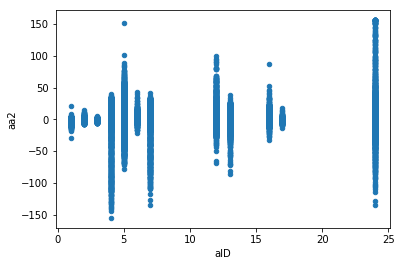

In [23]:
#Plot of one input variable (heart rate, ankle acceleration, etc) vs output (activity) 

subjects[1].plot(kind="scatter", x='aID',y='aa2')

^ this picture reassures me that I dropped the activityID = 0 terms

In [56]:
corr_matrix = final_set.corr()
corr_matrix["absacc_mean"].sort_values(ascending=False)

absacc_mean      1.000000
abshacc_mean     0.714323
absgyro_mean     0.592342
abshgyro_mean    0.581264
hr_mean          0.551717
aID              0.248856
Name: absacc_mean, dtype: float64

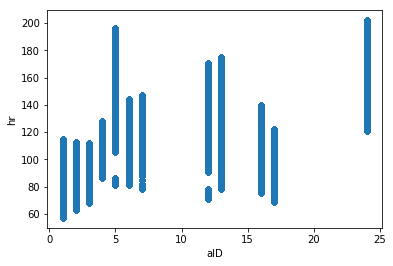

In [25]:
#Graphs showing data from all_subjects
all_subjects.plot(kind="scatter", x='aID',y='hr')

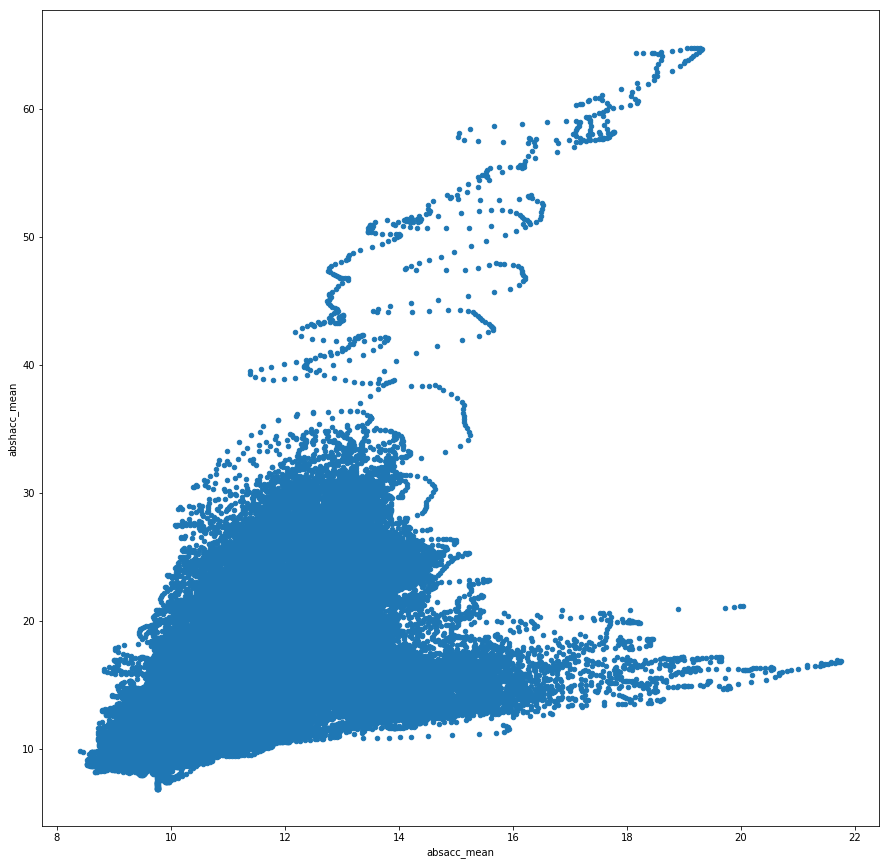

In [49]:
final_set = avg_set.dropna(axis = 0, how= 'any')
final_set.plot(kind = "scatter", x = 'absacc_mean', y = 'abshacc_mean')

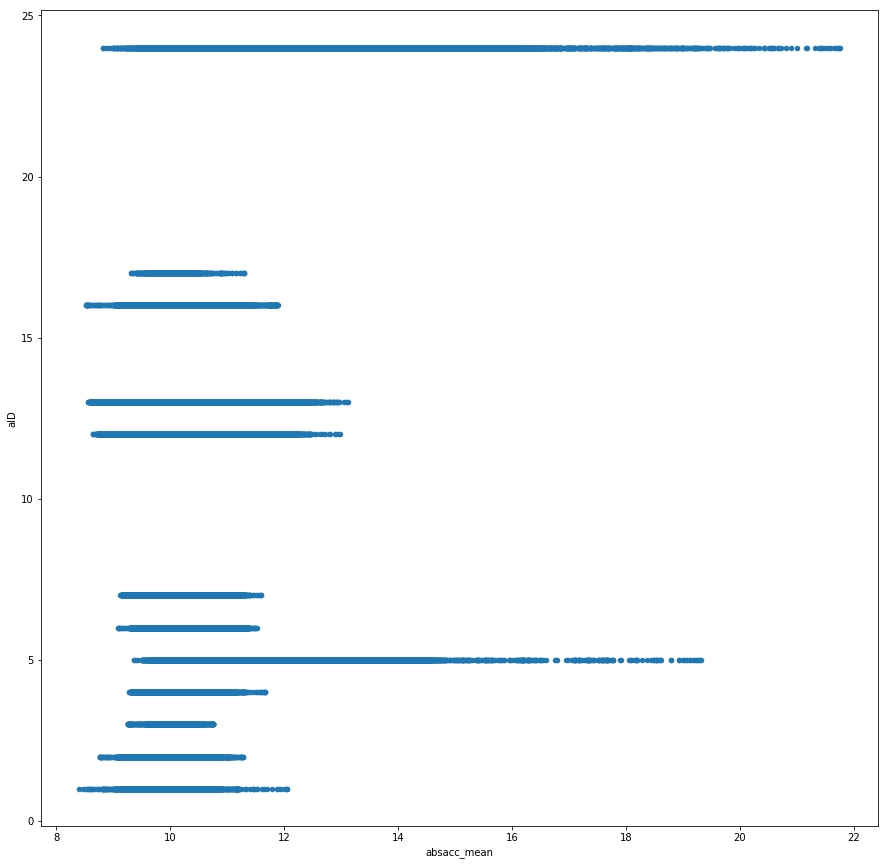

In [52]:
final_set.plot(kind = "scatter", x = 'absacc_mean', y = 'aID')

Text(0.5,0,'Spread of Hand Acceleration')

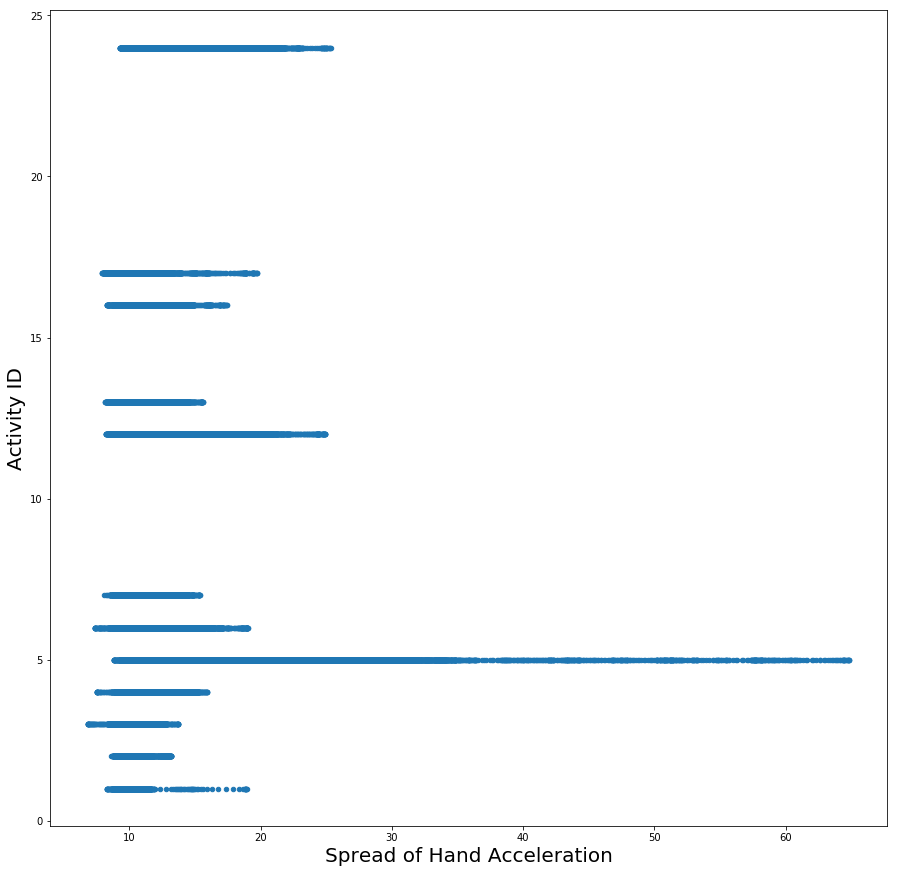

In [58]:
final_set.plot(kind = "scatter", x = 'abshacc_mean', y = 'aID')
plt.ylabel('Activity ID', fontsize = 20)
plt.xlabel('Spread of Hand Acceleration', fontsize = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001188D561B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001179E97F128>]], dtype=object)

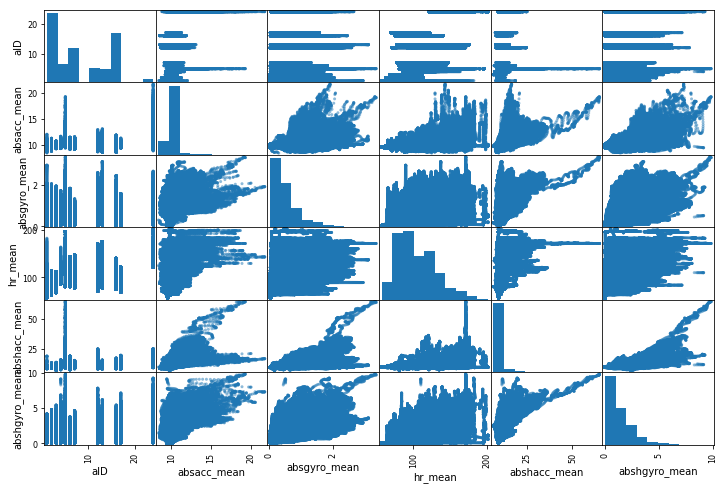

In [57]:
from pandas.plotting import scatter_matrix

attributes = ['aID','absacc_mean','absgyro_mean','hr_mean','abshacc_mean','abshgyro_mean']
scatter_matrix(final_set[attributes], figsize=(12, 8))

## Model Development

## Separating dataset into Training and Test sets

In [26]:
#len(all_subjects)*0.7 , len(all_subjects)

In [27]:
#70-30 split, training-test
#features = ['absacc_mean','hr_mean'] #trying with only 2 features, absolute acceleration and heart rate
#features = ['absacc_mean','hr_mean','absgyro_mean'] #trying with only 3 features, absolute acceleration and heart rate
features = ['absacc_mean','hr_mean','absgyro_mean','abshacc_mean','abshgyro_mean'] #trying with only 5 features, absolute acceleration and heart rate and hands

final_set = avg_set.dropna(axis = 0, how= 'any')

X = final_set[features].values
y = final_set['aID'].values

len(X), len(y)

(1593690, 1593690)

In [28]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)


C:\Users\Umar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
dtree.score(X_test,y_test)

0.96007169943129889

# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
clf.score(X_test, y_test)

0.97941674144072355

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
neigh.score(X_test, y_test)

0.97435092981278248

# Performance Metrics

In [46]:
#implementing sklearn confusion matrix code to produce nice-looking confusion matrices
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix
import itertools


activity_names = ['lying','sitting','standing','walking','running','cycling','Nordic walking',
                  'ascending stairs','descending stairs','vacuum cleaning','ironing','rope jumping']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', aspect = 'auto', cmap=cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=15,
                 color="white" if cm[i, j] > thresh else "black")
    #plt.tight_layout()
    plt.rcParams["figure.figsize"] = [15,15]
    plt.ylabel('True label', fontsize = 20)
    plt.xlabel('Predicted label', fontsize = 20)
    
#def plot_precision_recall(recall, precision, classes):
 #   plt.plot(recall, classes)
 #   plt.plot(precision, classes)

### Decision Tree

Confusion matrix, without normalization
[[56013    84    85    15     1     2     5    32    36    53    66     1]
 [   59 53038   684    10     7    11     5    15    26    56   239     0]
 [   73   699 51999    30     9     0    12    64    33   117   543     0]
 [   21     4    32 24524     8    42   543   243   219   414   248     6]
 [    5    12    10    17 16490     7    12    34    29    15     9    34]
 [    3     3     8    27     0 45630   200   131   138   371    24     6]
 [    8     7    20   531    14   221 33663   388   456   626    99    14]
 [   21    23   104   261    22   170   434 31642  1108   550   151    35]
 [   32    33    51   226    31   132   466  1085 28165   596   159    27]
 [   34    46   128   357    14   358   532   442   503 46379   645     1]
 [   40   184   502   196     4    16    50   111   107   589 64636     0]
 [    3     0     0     2    41    25    24    52    34     2     0  6838]]


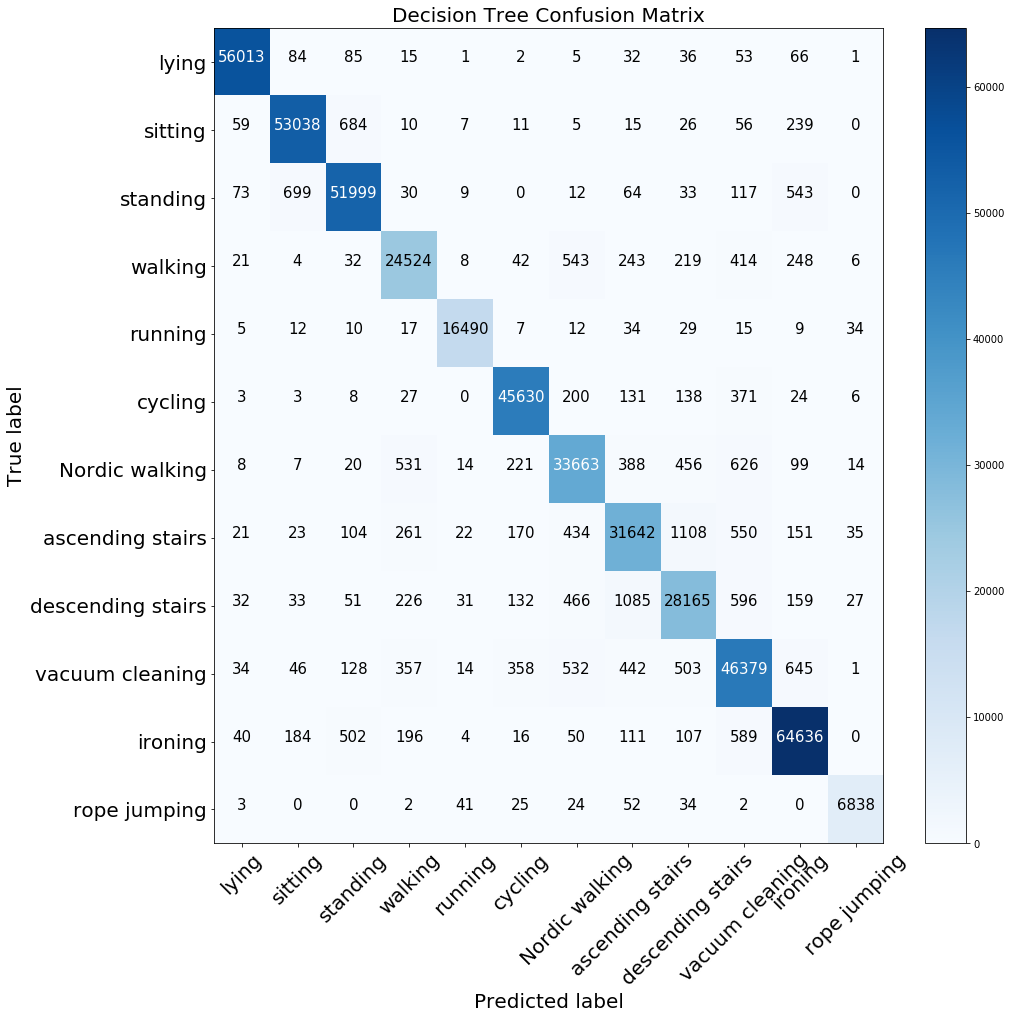

In [47]:

y_pred_tree = dtree.predict(X_test)
cnf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

plot_confusion_matrix(cnf_matrix_tree,classes = activity_names, title = 'Decision Tree Confusion Matrix')



(array([ 0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 6 Text yticklabel objects>)

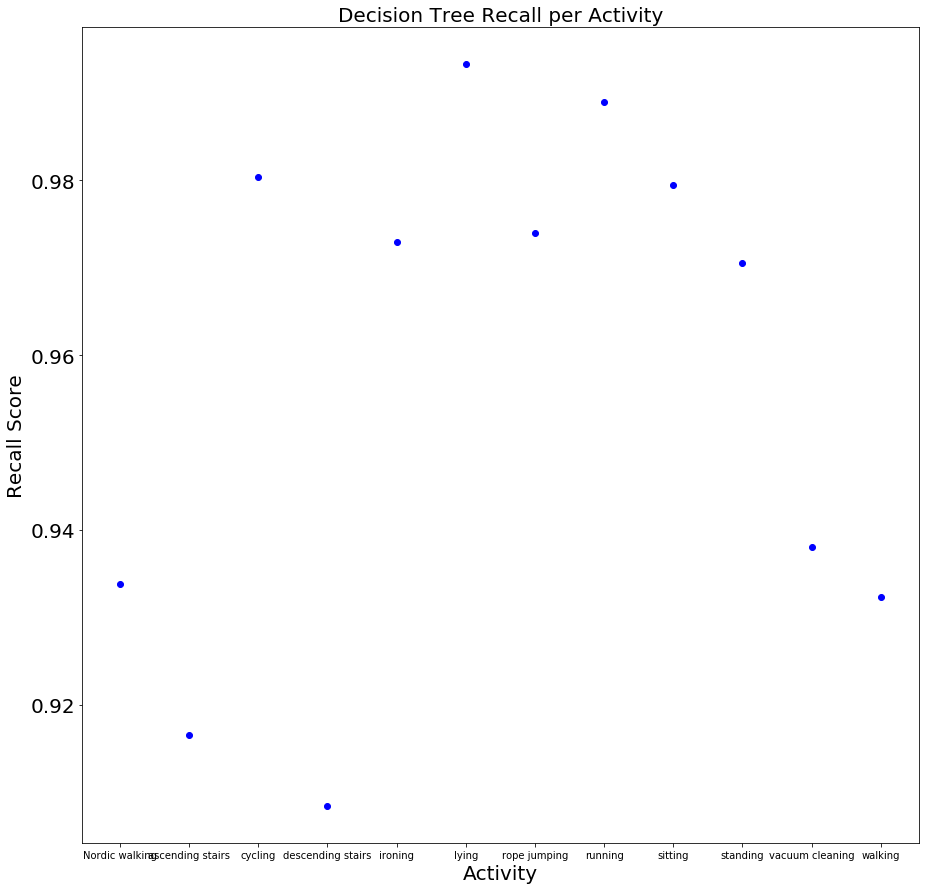

In [38]:
plt.plot(activity_names, recall_score(y_test, y_pred_tree, average=None),'bo')
plt.ylabel('Recall Score', fontsize = 20)
plt.xlabel('Activity', fontsize = 20)
plt.title('Decision Tree Recall per Activity', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)

(array([ 0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 6 Text yticklabel objects>)

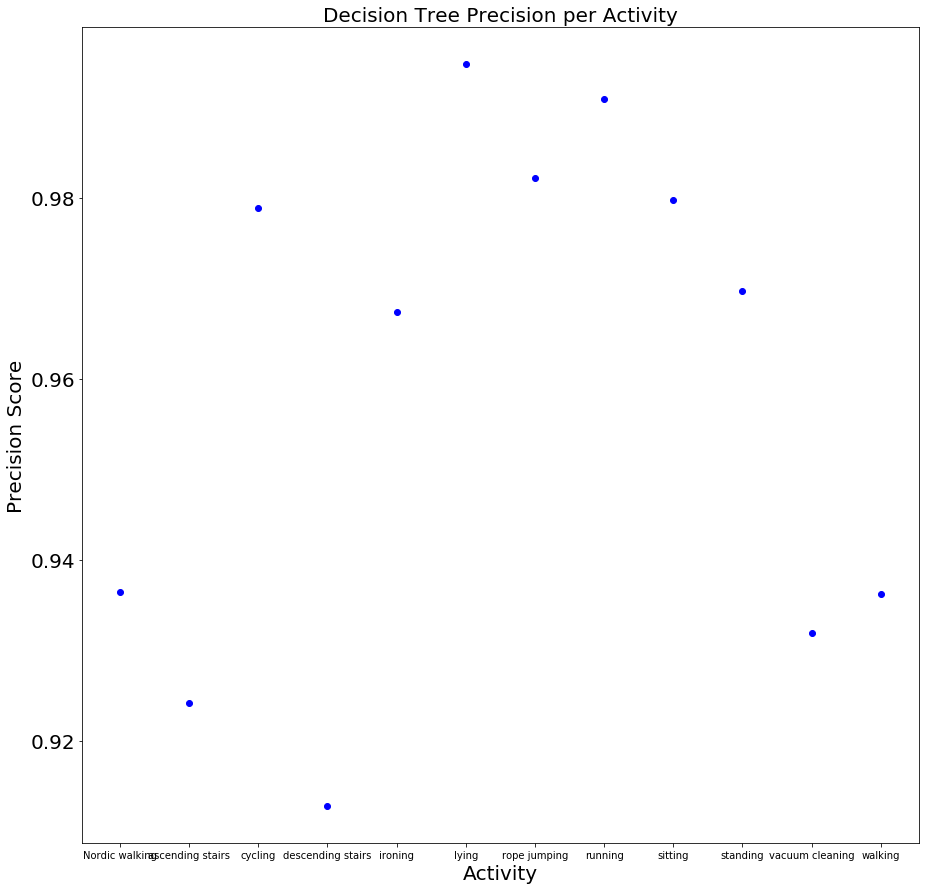

In [39]:
plt.plot(activity_names, precision_score(y_test, y_pred_tree, average=None),'bo')
plt.ylabel('Precision Score', fontsize = 20)
plt.xlabel('Activity', fontsize = 20)
plt.title('Decision Tree Precision per Activity', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)

### Random Forest Classifier

Confusion matrix, without normalization
[[56225    22    40     6     1     0     0    18     3    23    55     0]
 [   18 53716   219     1     0     1     0     2     2    21   170     0]
 [   14   312 52966     1     1     0     0     5     1    19   260     0]
 [    8     1    19 25449     0    34   382    54    59   160   138     0]
 [    0     3    11    25 16557     3     4    16    14    15    18     8]
 [    0     1     6     7     1 46328    65    32    27    68     6     0]
 [    2     2    16   341     3   163 34900   134   148   270    63     5]
 [   14    23    61   267     2   114   435 32747   380   386    89     3]
 [    5    18    55   231     5   120   452   730 28829   450   101     7]
 [    8    11    69   247     2   262   305   113   133 47966   323     0]
 [    5    37   249    94     1    17    10     8    26   262 65726     0]
 [    0     0     0     2    25    26    28    36    44     3     0  6857]]


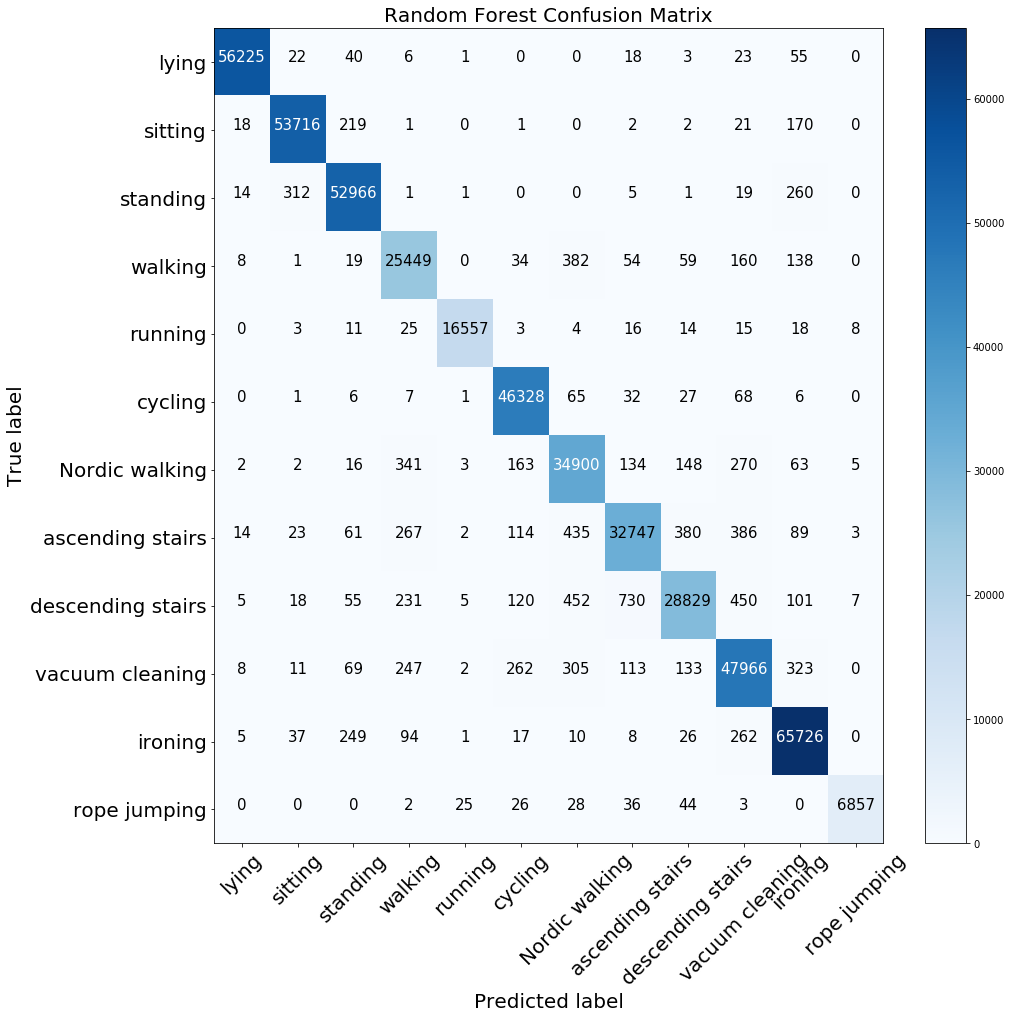

In [40]:
y_pred_forest = clf.predict(X_test)
cnf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

plot_confusion_matrix(cnf_matrix_forest,classes = activity_names, title = 'Random Forest Confusion Matrix')


(array([ 0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99,  1.  ,  1.01]),
 <a list of 10 Text yticklabel objects>)

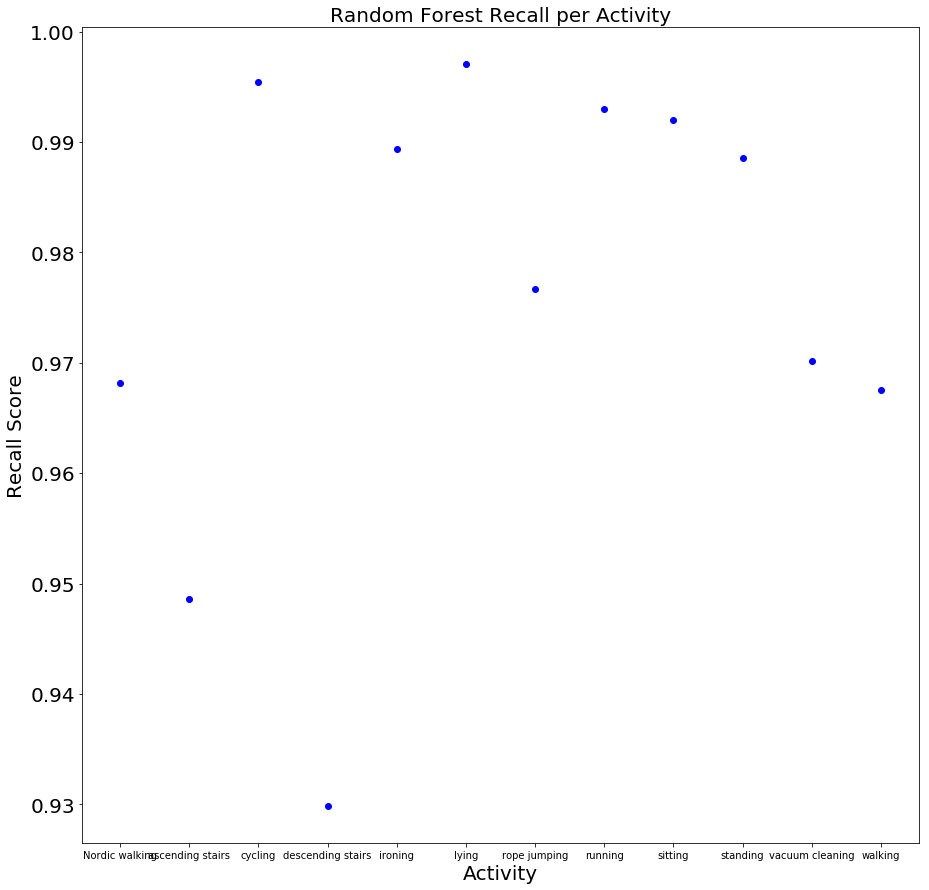

In [41]:
plt.plot(activity_names, recall_score(y_test, y_pred_forest, average=None),'bo')
plt.ylabel('Recall Score', fontsize = 20)
plt.xlabel('Activity', fontsize = 20)
plt.title('Random Forest Recall per Activity', fontsize=20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)

(array([ 0.95,  0.96,  0.97,  0.98,  0.99,  1.  ,  1.01]),
 <a list of 7 Text yticklabel objects>)

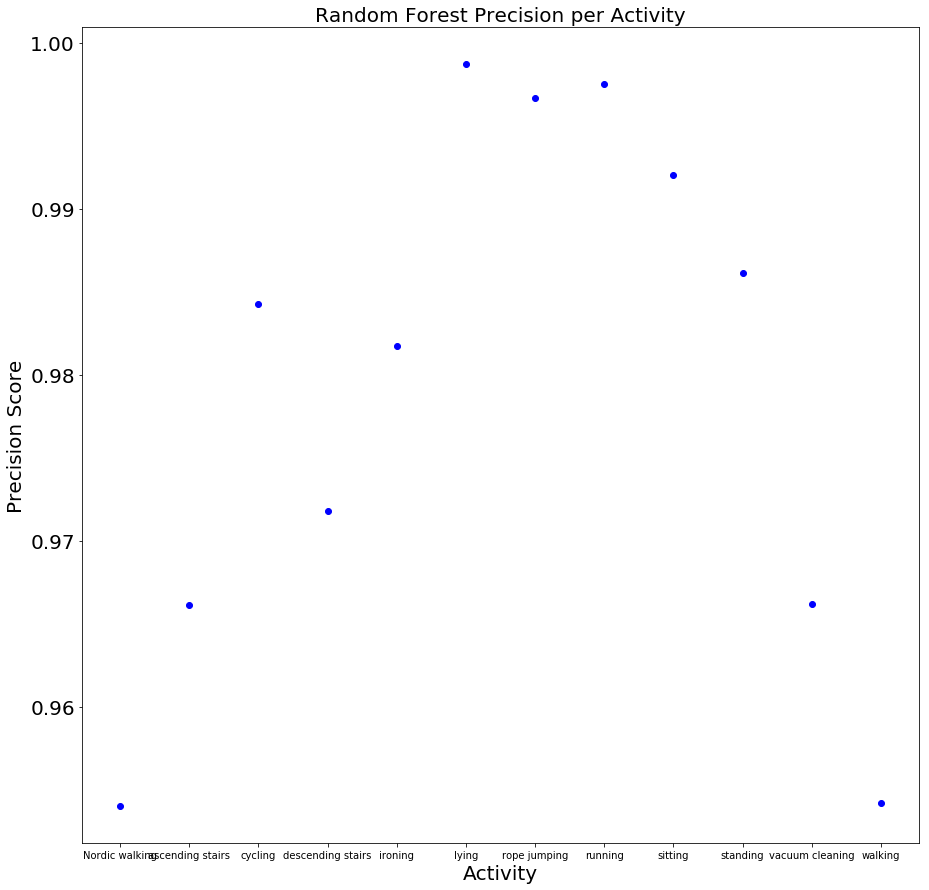

In [42]:
plt.plot(activity_names, precision_score(y_test, y_pred_forest, average=None),'bo')
plt.ylabel('Precision Score', fontsize = 20)
plt.xlabel('Activity', fontsize = 20)
plt.title('Random Forest Precision per Activity', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)

### KNN

Confusion matrix, without normalization
[[56003   149    91    19     6    11    17    22    32    16    22     5]
 [   53 53023   878    18     7     0     6     5    21    19   120     0]
 [   40   693 52514    13    10     0     6    14     6    29   254     0]
 [   13    16    28 25131    14    44   485   144   103   180   132    14]
 [    2    17    11    27 16472    31    26    28    20    14    11    15]
 [    1    10    18    28     3 46156    85    51    46   130     9     4]
 [   17    15    35   407     8   249 34027   323   399   479    80     8]
 [   17    38    97   252    19   143   448 32542   532   306   105    22]
 [   11    21    41   249    20   109   385   484 29186   327   113    57]
 [   14    34   120   198     2   108   234    81   108 48249   291     0]
 [   14    56   244    74     1     2    12    21    32   228 65751     0]
 [    0     0     0     5    47    24    29    62    61     3     0  6790]]


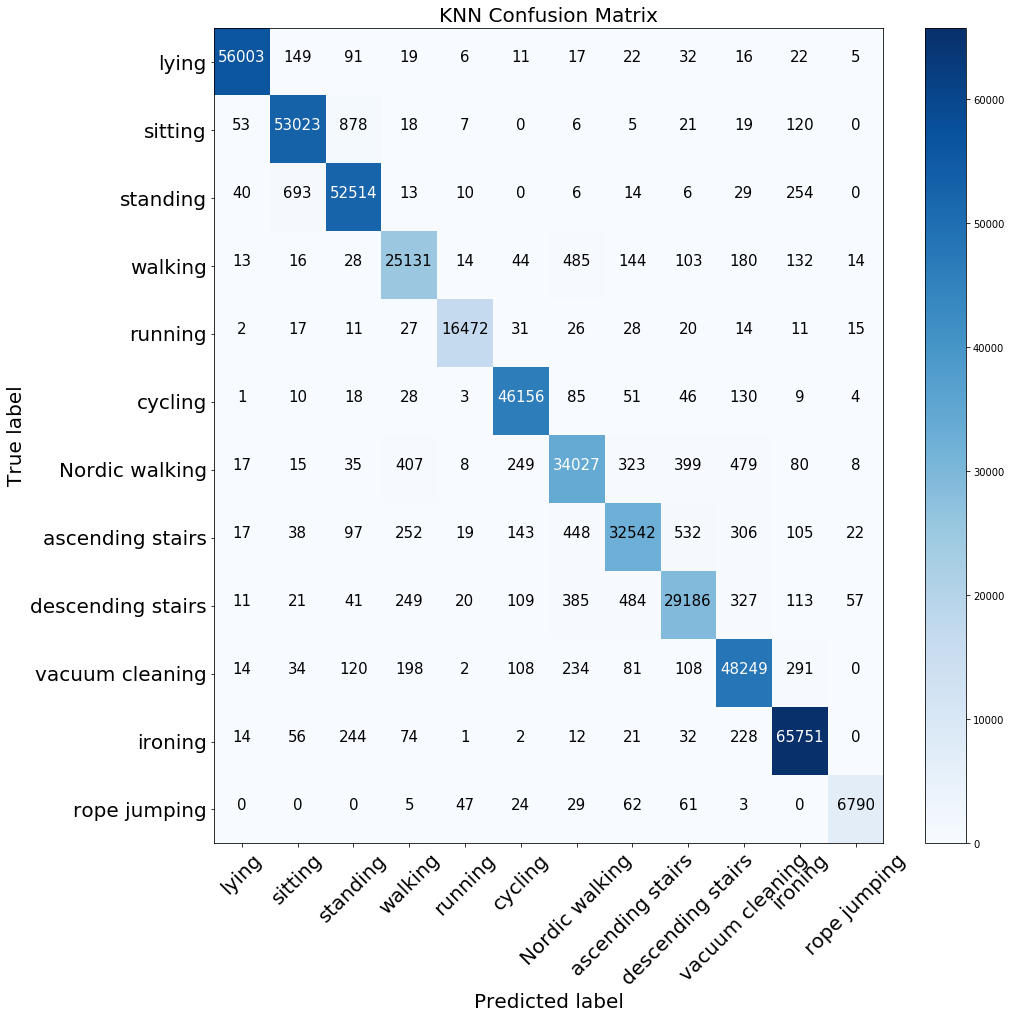

In [43]:
y_pred_knn = neigh.predict(X_test)
cnf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

plot_confusion_matrix(cnf_matrix_knn,classes = activity_names, title = 'KNN Confusion Matrix')


(array([ 0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99,  1.  ]),
 <a list of 8 Text yticklabel objects>)

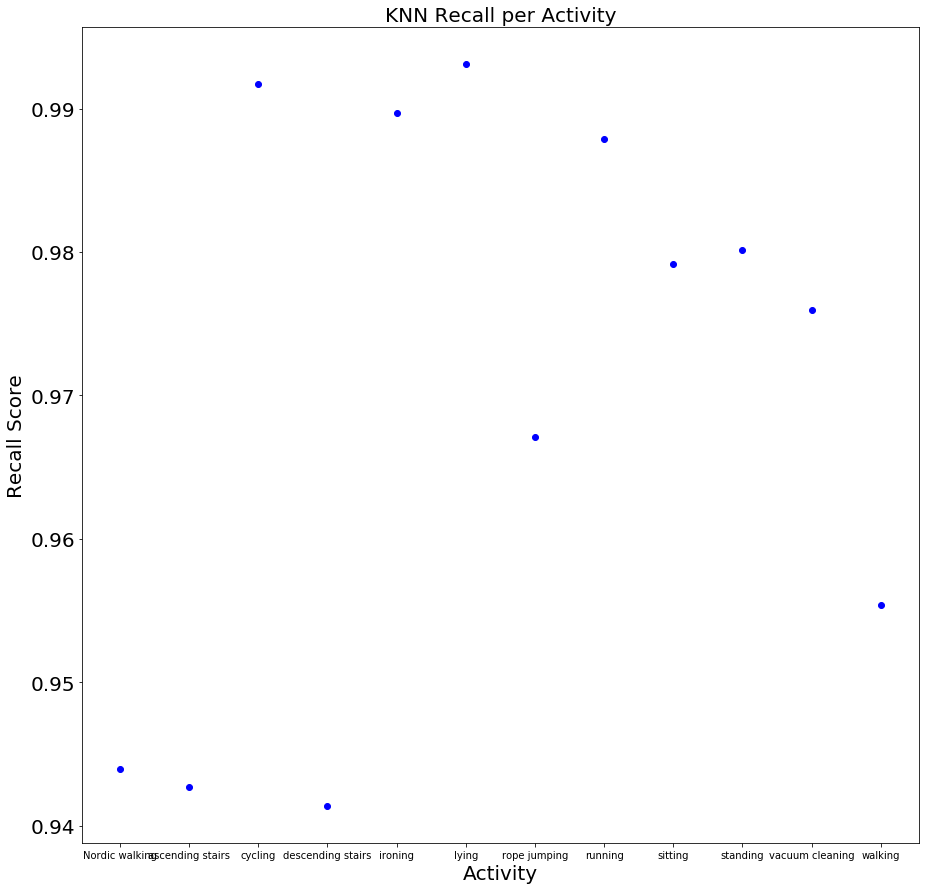

In [44]:
plt.plot(activity_names, recall_score(y_test, y_pred_knn, average=None),'bo')
plt.ylabel('Recall Score', fontsize = 20)
plt.xlabel('Activity', fontsize = 20)
plt.title('KNN Recall per Activity', fontsize=20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)

(array([ 0.94,  0.95,  0.96,  0.97,  0.98,  0.99,  1.  ]),
 <a list of 7 Text yticklabel objects>)

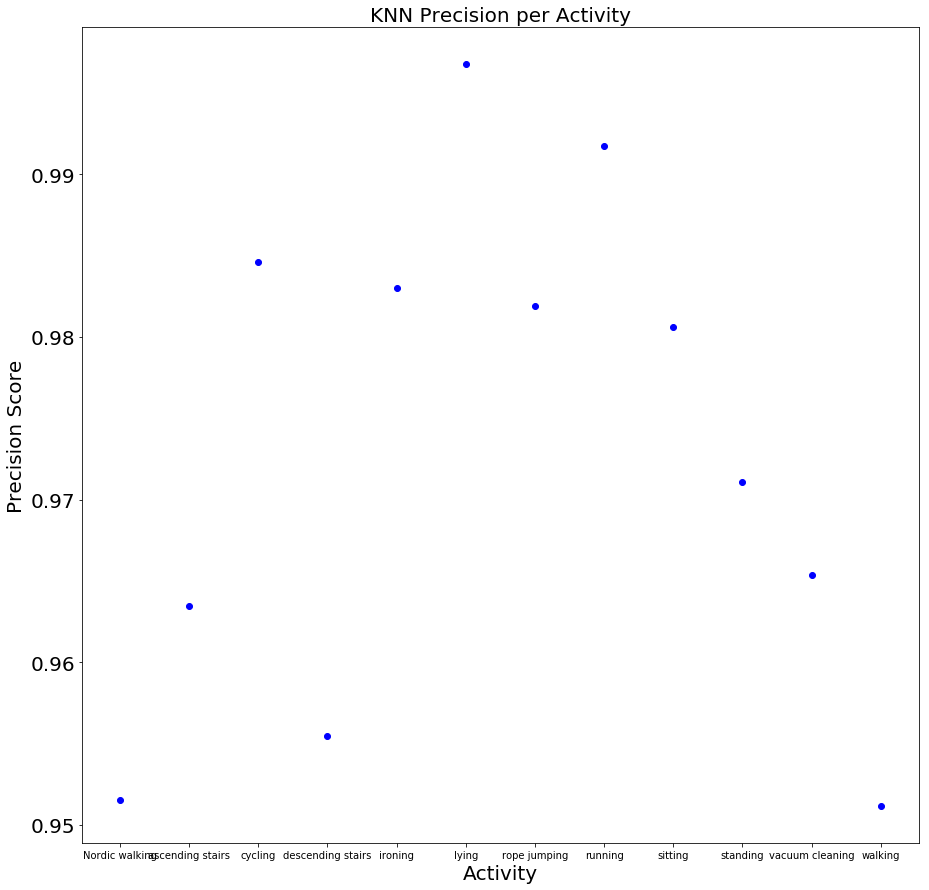

In [45]:
plt.plot(activity_names, precision_score(y_test, y_pred_knn, average=None),'bo')
plt.ylabel('Precision Score', fontsize = 20)
plt.xlabel('Activity', fontsize = 20)
plt.title('KNN Precision per Activity', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)